# A. Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scipyio
import seaborn as sns
import pandas as pd
from google.colab import drive
import os

# B. Reading Dataset

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
gestures_label = {
	 'Thumb_UP' : 0,
	 'Index' : 1,
	 'Right_Angle' : 2,
	 'Peace' : 3,
	 'Index_Little' : 4,
	 'Thumb_Little' : 5,
	 'Hand_Close' : 6,
	 'Hand_Open' : 7,
	 'Wrist_Extension' : 8,
	 'Wrist_Flexion' : 9,
	 'Ulner_Deviation' : 10,
	 'Radial_Deviation' : 11
}

gestures = ['Thumb_UP', 'Index_Little', 'Right_Angle', 'Peace', 'Index', 'Thumb_Little', 'Hand_Close', 'Hand_Open',
	 'Wrist_Extension', 'Wrist_Flexion', 'Ulner_Deviation', 'Radial_Deviation'
]

In [4]:
persons = ["Arifa", "Arnob", "Ashis", "Bayezid", "Bushra", "Choity", "Choity_new", "Eftekhar",
           "Fahim", "Humaid", "Humayun", "Johir", "Joy", "Mamun", "Noman", "Piyus", "Sazzad",
           "Shafi", "Shourav", "Tamim", "Wadud"]

In [5]:
filepath = "gdrive/My Drive/Forearm_Invariant_Data_Individual_CSV/Arifa_Rest.csv"
df = pd.read_csv(filepath)

In [6]:
df.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Class
0,-0.014648,-0.029297,-0.043945,-0.019531,-0.029297,-0.029297,-0.014648,-0.004883,5.0
1,0.000000,0.000000,-0.014648,0.019531,-0.039062,-0.014648,0.009766,-0.014648,5.0
2,-0.004883,-0.009766,-0.029297,-0.004883,-0.029297,0.004883,-0.004883,-0.004883,5.0
3,-0.019531,-0.004883,-0.083008,-0.083008,-0.048828,-0.034180,-0.053711,-0.014648,5.0
4,0.004883,-0.004883,-0.014648,0.014648,-0.048828,-0.039062,-0.068359,-0.024414,5.0


In [7]:
df.shape

(300000, 9)

In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [9]:
X = X/np.sqrt(np.mean(X))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# C. Model Training (ANN)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X,y,
    test_size = .2, shuffle=True, random_state=0
)

In [11]:
x_train.shape

(240000, 8)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
ann_model = models.Sequential([
    layers.Flatten(input_shape=(8,)),
    layers.Dense(2048, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(1024, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(512, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(256, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(32, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(16, activation='relu'),
    #layers.Dropout(.2),
    layers.Dense(12, activation='softmax'),
])

In [22]:
ann_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
history = ann_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
7500/7500 [==============================] - 40s 5ms/step - loss: 1.3815 - accuracy: 0.4976 - val_loss: 1.8164 - val_accuracy: 0.4076
Epoch 2/10
7500/7500 [==============================] - 39s 5ms/step - loss: 1.3769 - accuracy: 0.4998 - val_loss: 1.7890 - val_accuracy: 0.4088
Epoch 3/10
7500/7500 [==============================] - 37s 5ms/step - loss: 1.3692 - accuracy: 0.5009 - val_loss: 1.7866 - val_accuracy: 0.4053
Epoch 4/10
7500/7500 [==============================] - 37s 5ms/step - loss: 1.3653 - accuracy: 0.5033 - val_loss: 1.8042 - val_accuracy: 0.4055
Epoch 5/10
7500/7500 [==============================] - 38s 5ms/step - loss: 1.3600 - accuracy: 0.5047 - val_loss: 1.8144 - val_accuracy: 0.4105
Epoch 6/10
7500/7500 [==============================] - 39s 5ms/step - loss: 1.3681 - accuracy: 0.5057 - val_loss: 1.8241 - val_accuracy: 0.4032
Epoch 7/10
7500/7500 [==============================] - 39s 5ms/step - loss: 1.3520 - accuracy: 0.5076 - val_loss: 1.8222 - val_ac

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann_model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : ")
print(classification_report(y_test, y_pred_classes))

1875/1875 [==============================] - 5s 2ms/step
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.34      0.31      0.32      4976
         1.0       0.28      0.21      0.24      4994
         2.0       0.33      0.22      0.26      4952
         3.0       0.29      0.27      0.28      5012
         4.0       0.33      0.50      0.40      5004
         5.0       0.32      0.35      0.33      5060
         6.0       0.32      0.36      0.34      5025
         7.0       0.40      0.36      0.38      4998
         8.0       0.49      0.61      0.55      4920
         9.0       0.67      0.48      0.56      5056
        10.0       0.46      0.53      0.49      5031
        11.0       0.66      0.64      0.65      4972

    accuracy                           0.40     60000
   macro avg       0.41      0.40      0.40     60000
weighted avg       0.41      0.40      0.40     60000



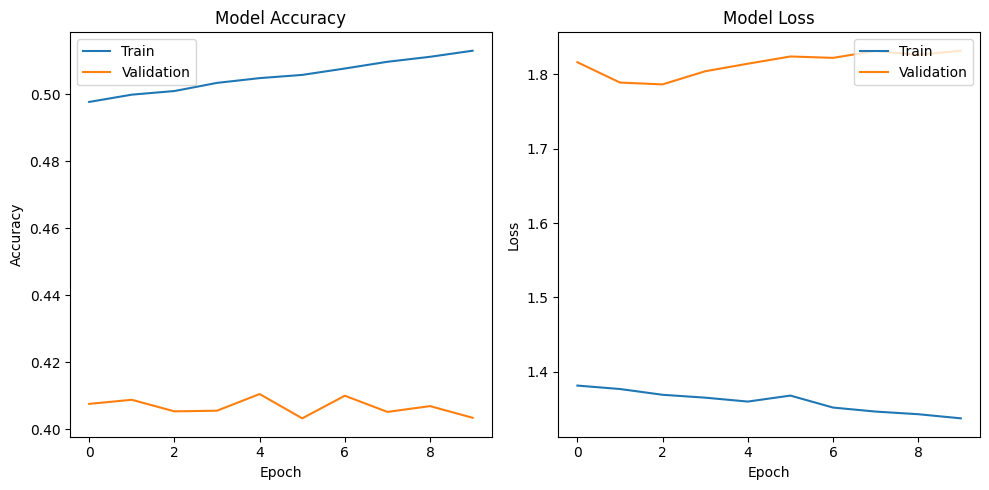

In [24]:
# Plotting model accuracy and loss
def plot_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    plt.tight_layout()
    plt.show()

# Call the function to plot the history
plot_history(history)

# Validating using Pronation Data

In [25]:
pronation_filepath = "gdrive/My Drive/Forearm_Invariant_Data_Individual_CSV/Arifa_Pronation.csv"
P_df = pd.read_csv(filepath)
X_P = P_df.iloc[:, 0:-1]
y_P = P_df.iloc[:, -1]
X_P = X/np.sqrt(np.mean(X_P))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann_model.predict(X_P)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : ")
print(classification_report(y_P, y_pred_classes))

9375/9375 [==============================] - 23s 2ms/step
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.20      0.13      0.16     25000
         1.0       0.07      0.00      0.00     25000
         2.0       0.18      0.04      0.06     25000
         3.0       0.11      0.03      0.05     25000
         4.0       0.00      0.00      0.00     25000
         5.0       0.20      0.13      0.16     25000
         6.0       0.19      0.03      0.05     25000
         7.0       0.26      0.01      0.02     25000
         8.0       0.25      0.53      0.34     25000
         9.0       0.20      0.78      0.32     25000
        10.0       0.21      0.28      0.24     25000
        11.0       0.24      0.67      0.35     25000

    accuracy                           0.22    300000
   macro avg       0.18      0.22      0.15    300000
weighted avg       0.18      0.22      0.15    300000

